In [9]:
from scipy.fft import fft, fftfreq, ifft, fftshift
import numpy as np
import matplotlib.pyplot as plt

## 3.11 DFT RESOLUTION, ZERO PADDING, AND FREQUENCY-DOMAIN SAMPLING

In [10]:
# exactly 3 periods over 16 samples
N  = 16
n  = np.arange(0, N, 1)
fs = 1000 * N  # Sampling rate in Hz
fo = 1000 * 3   # 3 full cycles for 64 samples
ts = 1.0 / fs
x  = 1.0*np.sin(2*np.pi*fo*n*ts)

(0.0, 6.5)

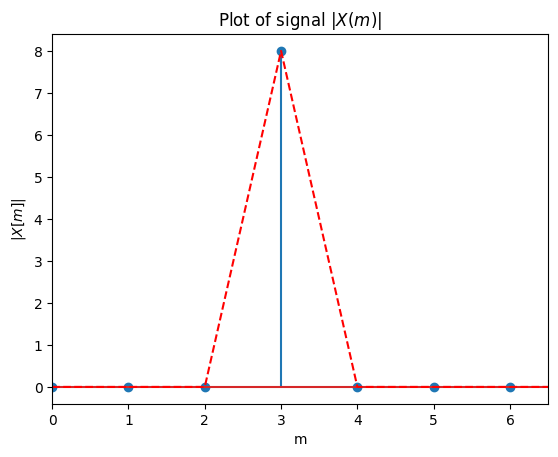

In [26]:
N = 16
X = fft(x, N)
plt.figure()
plt.xlabel('m');
plt.ylabel(r'$|X[m]|$');
plt.title(r'Plot of signal $|X(m)|$');
X_m = np.absolute(X)
plt.stem(np.arange(0, N, 1), X_m)
plt.plot(np.arange(0, N, 1), X_m, 'r--')
plt.xlim([0, N*3/8 + 0.5])

In [47]:
print(np.absolute(8 * np.sinc(0.5*(7 - 6))))
print(np.absolute(8 * np.sinc(0.5*(5 - 6))))

5.092958178940651
5.092958178940651


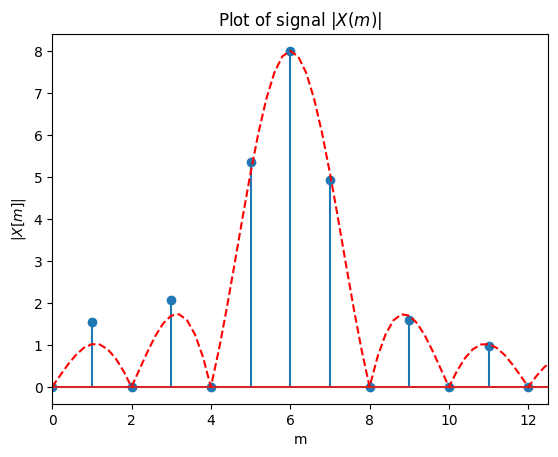

In [57]:
N = 32
X = fft(x, N)
plt.figure()
plt.xlabel('m');
plt.ylabel(r'$|X[m]|$');
plt.title(r'Plot of signal $|X(m)|$');
X_m = np.absolute(X)
plt.stem(np.arange(0, N, 1), X_m)
n1 = np.arange(0, N, 0.2)
plt.plot(n1, np.absolute(8 * np.sinc(0.5*(n1 - 6))), 'r--')
plt.xlim([0, N*3/8 + 0.5])
plt.show()
# print(np.round(np.absolute(8 * np.sinc(0.5*(n1 - 6))), 4))
# print(np.round(X_m, 4))

(0.0, 24.5)

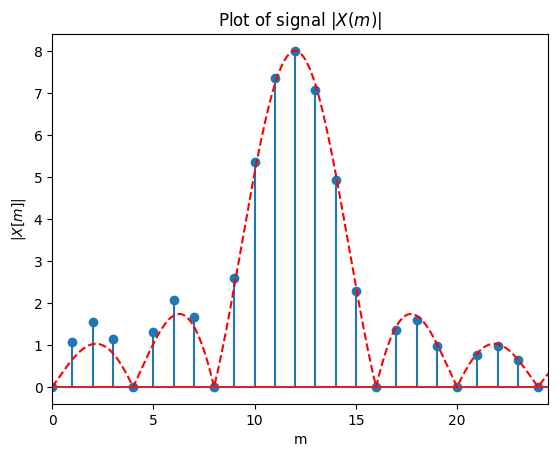

In [41]:
N = 64
X = fft(x, N)
plt.figure()
plt.xlabel('m');
plt.ylabel(r'$|X[m]|$');
plt.title(r'Plot of signal $|X(m)|$');
X_m = np.absolute(X)
plt.stem(np.arange(0, N, 1), X_m)
n1 = np.arange(0, N, 0.1)
plt.plot(n1, np.absolute(8 * np.sinc(0.25*(n1 - 12))), 'r--')
plt.xlim([0, N*3/8 + 0.5])
plt.show()

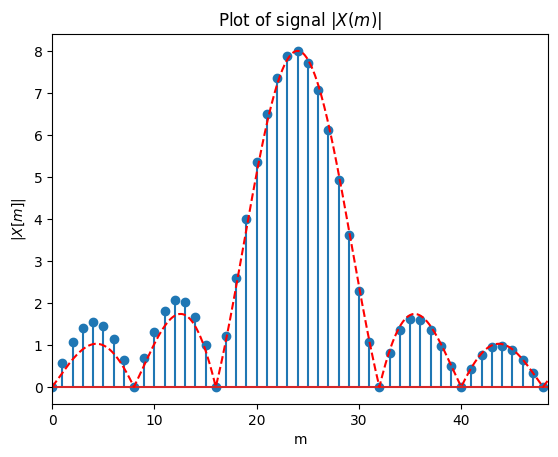

In [44]:
N = 128
X = fft(x, N)
plt.figure()
plt.xlabel('m');
plt.ylabel(r'$|X[m]|$');
plt.title(r'Plot of signal $|X(m)|$');
X_m = np.absolute(X)
plt.stem(np.arange(0, N, 1), X_m)
n1 = np.arange(0, N, 0.1)
plt.plot(n1, np.absolute(8 * np.sinc(0.125*(n1 - 24))), 'r--')
plt.xlim([0, N*3/8 + 0.5])
plt.show()

In [ ]:
fs = 8000  # Sampling rate in Hz
n = np.arange(0, 8, 1)  # Time vector
ts = 1.0 / fs
# Signal with 1000 Hz and 2000 Hz components
x = 1.0*np.sin(2*np.pi*1000*n*ts) + 0.5*np.sin(2*np.pi*2000*n*ts + (3/4)*np.pi)

In [ ]:
x

In [ ]:
X = fft(x)

In [ ]:
np.around(X,4)

In [ ]:
N = 8
Y = np.array([0+0*1j]*N)
for m in range(N):
    Y[m] = 0 + 0*1j
    for n in range(N):
        Y[m] = Y[m] + x[n] * (np.cos(-2*np.pi*n*m/N) + 1j*np.sin(-2*np.pi*n*m/N))

In [ ]:
np.around(Y,4)

In [ ]:
np.allclose(X, Y)

In [ ]:
x_1 = np.roll(x, -3)
x_1

In [ ]:
X_1 = fft(x_1)
np.around(X_1,4)

In [ ]:
X_2 = np.array([0+0*1j]*N)
for m in range(N):
    X_2[m] = np.exp(1j * 2 * np.pi * 3 * m / N) * X[m]
np.around(X_2,4)

In [ ]:
np.allclose(X_1, X_2)

In [ ]:
x_ifft = ifft(X)
np.around(x_ifft,4)

In [ ]:
Y_inv = np.array([0+0*1j]*N)
for m in range(N):
    Y_inv[m] = 0 + 0*1j
    for n in range(N):
        # Y_inv[m] = Y_inv[m] + (1 / N) * X[n] * (np.cos(2*np.pi*n*m/N) + 1j*np.sin(2*np.pi*n*m/N))
        Y_inv[m] = Y_inv[m] + (1 / N) * X[n] * np.exp(2*np.pi*n*m/N*1j)
np.around(Y_inv, 4)

In [ ]:
np.allclose(x_ifft, Y_inv)

## 3.8 DFT leakage

In [ ]:
# exactly 3 periods over 64 samples
N  = 64
n  = np.arange(0, N, 1)
fs = 1000 * 64  # Sampling rate in Hz
fo = 1000 * 3   # 3 full cycles for 64 samples
ts = 1.0 / fs
x  = 1.0*np.sin(2*np.pi*fo*n*ts)

plt.xlabel('n');
plt.ylabel('x[n]');
plt.title(r'$x[n] = \sin (2\pi f_o n t_s)$');
plt.stem(n, x);

In [ ]:
X = fft(x)
plt.xlabel('m');
plt.ylabel(r'$|X[m]|$');
plt.title(r'Plot of DT signal $|X(m)|$');
X_m = np.absolute(X)
plt.stem(n, X_m)

In [ ]:
k = 28.6
k = 3.4
k = 16.4
fo = 1000 * k   # 3.4 full cycles for 64 samples
x  = 1.0*np.sin(2*np.pi*fo*n*ts)

plt.xlabel('n');
plt.ylabel('x[n]');
plt.title(r'$x[n] = \sin (2\pi f_o n t_s)$');
plt.stem(n, x);

In [ ]:
X = fft(x)
plt.xlabel('m');
plt.ylabel(r'$|X[m]|$');
plt.title(r'Plot of signal $|X(m)|$');
X_m = np.absolute(X)
plt.stem(n, X_m)

X_sinc = np.zeros_like(X_m)
for m in range(N):
    if m >= N // 2:
        X_sinc[m] = np.absolute(N / 2 * np.sinc((k - (N - m))))
    else:
        X_sinc[m] = np.absolute(N / 2 * np.sinc((k - m)))

plt.stem(n, X_sinc, 'r')


## 3.9 Windows

* Reproduce hanning window in numpy

In [ ]:
# https://numpy.org/doc/stable/reference/generated/numpy.hanning.html
N = 16

window = np.hanning(N)
print(len(window))
print(f'window is: {window}')

n  = np.arange(0, N, 1)
print(n)
window_manual = 0.5 - 0.5 * np.cos(2 * np.pi * n / (N-1))
print(f'window_manual is: {window_manual}')

np.allclose(window, window_manual)

* Reproduce hamming window in numpy

In [ ]:
# https://numpy.org/doc/stable/reference/generated/numpy.hamming.html

N = 16
n  = np.arange(0, N, 1)
window = np.hamming(N)
print(f'window is: {window}')
window_manual = 0.54 - 0.46 * np.cos(2 * np.pi * n / (N-1))
np.allclose(window, window_manual)

In [ ]:
x = np.arange(-3, 3, 0.01)
y = np.zeros(len(x))
y[200:400] = 1
yShift = np.fft.fftshift(y)
fftyShift = np.fft.fft(yShift)
ffty = np.fft.fftshift(fftyShift)

plt.plot(ffty)
plt.show()

In [ ]:
N = 16
window = 1 + np.zeros(N)
plt.figure()
A = fft(window)
mag = np.abs(A)
# freq = np.linspace(-0.5, 0.5, len(A))
# with np.errstate(divide='ignore', invalid='ignore'):
#    response = 20 * np.log10(mag)
# response = np.clip(response, -100, 100)
plt.plot(mag)
plt.title("Frequency response of the square window")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.axis('tight')
# plt.xlim([0, 0.12])
# plt.ylim([-60, 5])
plt.show()
print(window)
np.around(A, 4)

* Hanning window

In [ ]:
# https://numpy.org/doc/stable/reference/generated/numpy.hanning.html
N = 128

import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
window = np.hanning(N)
plt.plot(window)
plt.title("Hann window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

In [ ]:
plt.figure()
A = fft(window, 2048) / (N / 2)
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
with np.errstate(divide='ignore', invalid='ignore'):
    response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)
plt.plot(freq, response, '-.')
plt.title("Frequency response of the Hann window")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.axis('tight')
plt.xlim([0, 0.12])
plt.ylim([-60, 1])
plt.show()

In [ ]:
# https://numpy.org/doc/stable/reference/generated/numpy.hamming.html

window = np.hamming(N)
plt.plot(window)
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()
plt.figure()
A = fft(window, 2048) / (N/2)
mag = np.abs(fftshift(A))
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(mag)
response = np.clip(response, -100, 100)
plt.plot(freq, response, '-.')
plt.title("Frequency response of Hamming window")
plt.ylabel("Magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.axis('tight')
plt.xlim([0, 0.12])
plt.ylim([-60, 5])
plt.show()

* Apply hanning window with 3.4 cycles sine wave

In [ ]:
N  = 64
n  = np.arange(0, N, 1)
k = 3.4
fs = 1000 * 64  # Sampling rate in Hz
ts = 1.0 / fs
fo = 1000 * k   # 3.4 full cycles for 64 samples
fo1 = 1000 * 7  # 7.0 full cycles for 64 samples
x = 1.0*np.sin(2*np.pi*fo*n*ts) + 0.1*np.sin(2*np.pi*fo1*n*ts)
# x = 1.0*np.sin(2*np.pi*fo*n*ts)
plt.figure()
plt.stem(n, x * np.hanning(N + 1)[:N])

plt.figure()
X = fft(x)
plt.xlabel('m');
plt.ylabel(r'$|X[m]|$');
plt.xlim([0, 32])
plt.title(r'Plot of signal $|X(m)|$');
X_m = np.absolute(X)
plt.stem(n, X_m, 'o')

x_win = x * np.hanning(N + 1)[:N]
X_win = fft(x_win)
X_win_m = np.absolute(X_win)
plt.stem(n, X_win_m, 'r')